In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

##**dataset 1**

In [2]:
dataset1 = pd.read_csv("/content/software_requirements_extended (1).csv")
dataset1


Type                                        Requirement
0     PE  The system shall refresh the display every 60 ...
1     LF  The application shall match the color of the s...
2     US   If projected  the data must be readable.  On ...
3      A   The product shall be available during normal ...
4     US   If projected  the data must be understandable...
..   ...                                                ...
972   FR  There will be a designated phone number that u...
973   FR  Texts sent to that number will be sent to the ...
974   FR  If a question is not understood by our API, th...
975   FR  Upon the USB being plugged in the system shall...
976   FR  The system shall be able to handle 1000 custom...

[977 rows x 2 columns]

In [3]:
print(dataset1.dtypes)


Type           object
Requirement    object
dtype: object


In [4]:
print(dataset1.shape)


(977, 2)


In [5]:
print("Distribution of each requirement type:")
print(dataset1['Type'].value_counts())

Distribution of each requirement type:
Type
FR     312
F      209
NFR    110
US      63
O       58
SE      56
PE      54
LF      34
A       21
SC      21
MN      17
L       10
FT      10
PO       2
Name: count, dtype: int64


In [6]:
print("\nUnique requirement types in 'Type' column:")
print(dataset1['Type'].unique())


Unique requirement types in 'Type' column:
['PE' 'LF' 'US' 'A' 'SE' 'F' 'L' 'O' 'PO' 'SC' 'FT' 'MN' 'FR' 'NFR']


<ipython-input-7-cbee0d604879>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset1, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')


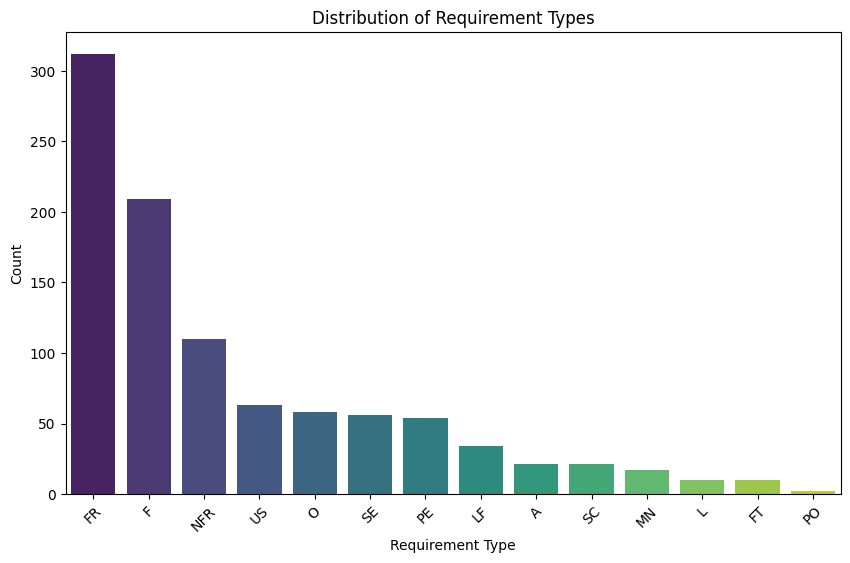

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset1, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')
plt.title("Distribution of Requirement Types")
plt.xlabel("Requirement Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-4ba8a4d6cff3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset1, x='Category', palette='Set2')


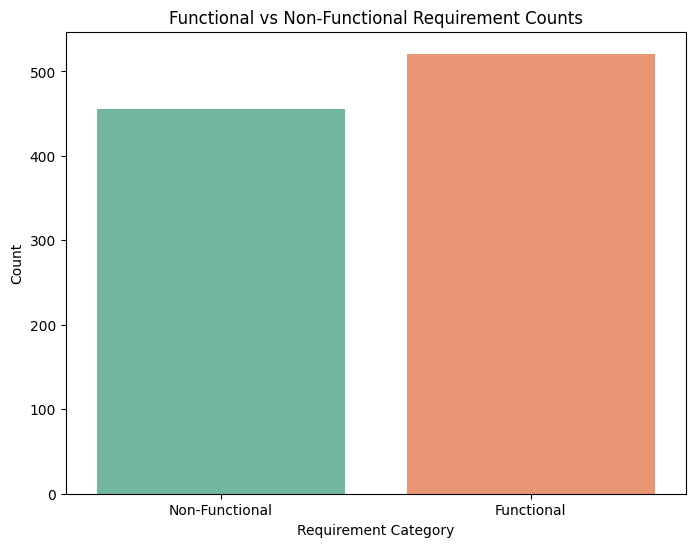

In [8]:
functional_labels = ['F', 'FR']  # Adjust these labels if needed for Functional requirements
dataset1['Category'] = dataset1['Type'].apply(lambda x: 'Functional' if x in functional_labels else 'Non-Functional')
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset1, x='Category', palette='Set2')
plt.title("Functional vs Non-Functional Requirement Counts")
plt.xlabel("Requirement Category")
plt.ylabel("Count")
plt.show()

Summary statistics for requirement lengths:


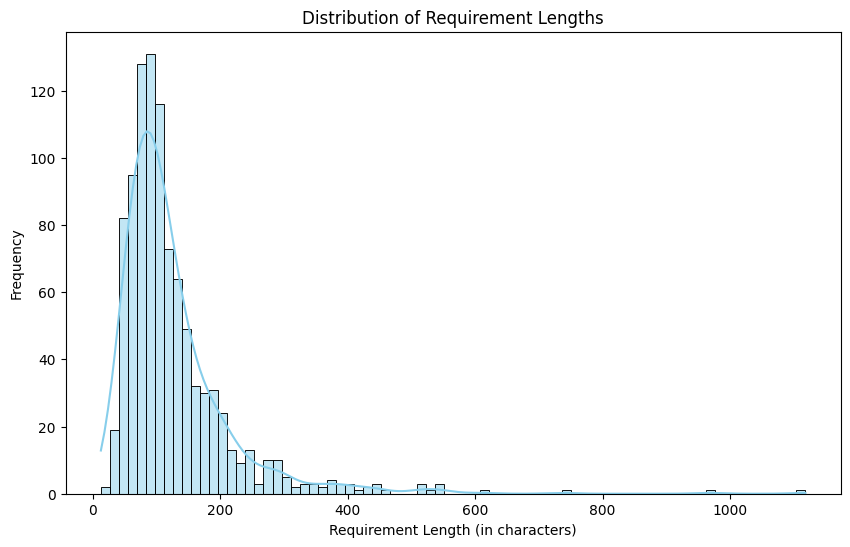

In [9]:
dataset1['Requirement_Length'] = dataset1['Requirement'].apply(len)
print("Summary statistics for requirement lengths:")
plt.figure(figsize=(10, 6))
sns.histplot(dataset1['Requirement_Length'], kde=True, color='skyblue')
plt.title("Distribution of Requirement Lengths")
plt.xlabel("Requirement Length (in characters)")
plt.ylabel("Frequency")
plt.show()

In [10]:
dataset1['Word_Count'] = dataset1['Requirement'].apply(lambda x: len(x.split()))   # Word count
dataset1['Character_Count'] = dataset1['Requirement'].apply(len)
print("Summary statistics for word counts:")
print(dataset1['Word_Count'].describe())
print("\nSummary statistics for character counts:")
print(dataset1['Character_Count'].describe())

Summary statistics for word counts:
count    977.000000
mean      21.146366
std       15.098178
min        2.000000
25%       12.000000
50%       17.000000
75%       24.000000
max      179.000000
Name: Word_Count, dtype: float64

Summary statistics for character counts:
count     977.000000
mean      126.743091
std        92.693852
min        13.000000
25%        75.000000
50%       103.000000
75%       146.000000
max      1118.000000
Name: Character_Count, dtype: float64


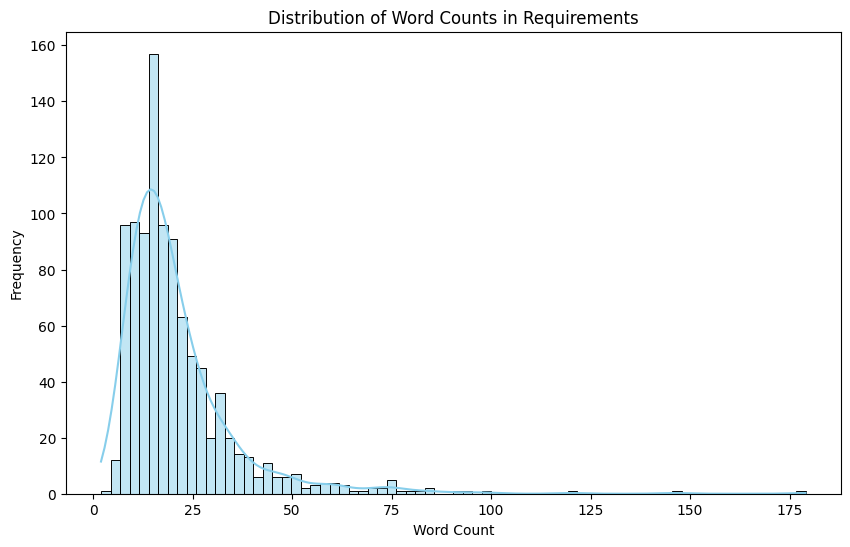

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset1['Word_Count'], kde=True, color='skyblue')
plt.title("Distribution of Word Counts in Requirements")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [45]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

nltk.download('punkt')


# 1. Average Length of All Requirements
def average_length(dataset1):
    avg_length = dataset1['Requirement'].apply(len).mean()
    return avg_length

# 2. Textual Complexity Analysis
def textual_complexity(dataset1):
    word_lengths = dataset1['Requirement'].apply(lambda x: [len(word) for word in word_tokenize(x)])
    avg_word_length = word_lengths.apply(lambda x: sum(x) / len(x)).mean()
    sentence_counts = dataset1['Requirement'].apply(lambda x: len(sent_tokenize(x)))
    avg_sentence_length = dataset1['Requirement'].apply(lambda x: len(word_tokenize(x)) / len(sent_tokenize(x)))

    complexity_data = {
        'avg_word_length': avg_word_length,
        'avg_sentence_count': sentence_counts.mean(),
        'avg_sentence_length': avg_sentence_length.mean()
    }

    return complexity_data

# 3. Unique vs. Repeated Requirements
def unique_vs_repeated(dataset1):
    requirement_counts = dataset1['Requirement'].value_counts()
    repeated_requirements = requirement_counts[requirement_counts > 1]
    unique_requirements_count = len(requirement_counts[requirement_counts == 1])

    return {
        'total_requirements': len(dataset1),
        'unique_requirements': unique_requirements_count,
        'repeated_requirements': len(repeated_requirements),
        'repeated_requirements_list': repeated_requirements
    }

# Run the analyses
avg_length = average_length(dataset1)
complexity = textual_complexity(dataset1)
uniqueness = unique_vs_repeated(dataset1)

# Output results
print("Average Length of All Requirements:")
print(avg_length)

print("\nTextual Complexity:")
print(complexity)

print("\nUnique vs. Repeated Requirements:")
print(uniqueness)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Length of All Requirements:
126.74309109518936

Textual Complexity:
{'avg_word_length': 4.68680406618402, 'avg_sentence_count': 1.3203684749232343, 'avg_sentence_length': 17.417780377248132}

Unique vs. Repeated Requirements:
{'total_requirements': 977, 'unique_requirements': 975, 'repeated_requirements': 1, 'repeated_requirements_list': Requirement
Only registered customers can purchase streaming movies.    2
Name: count, dtype: int64}


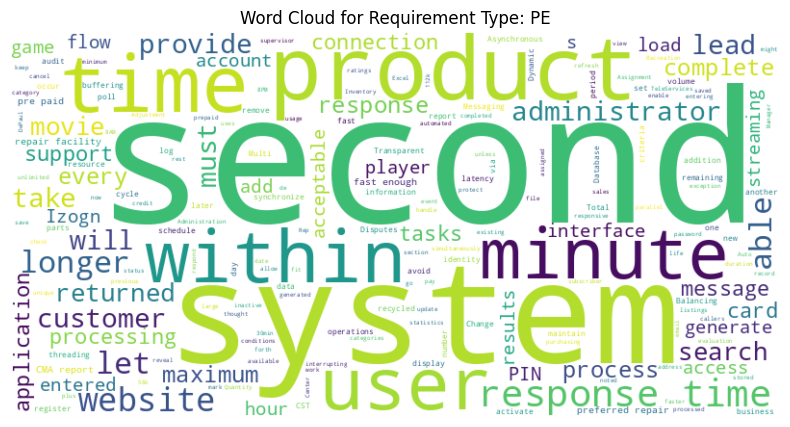

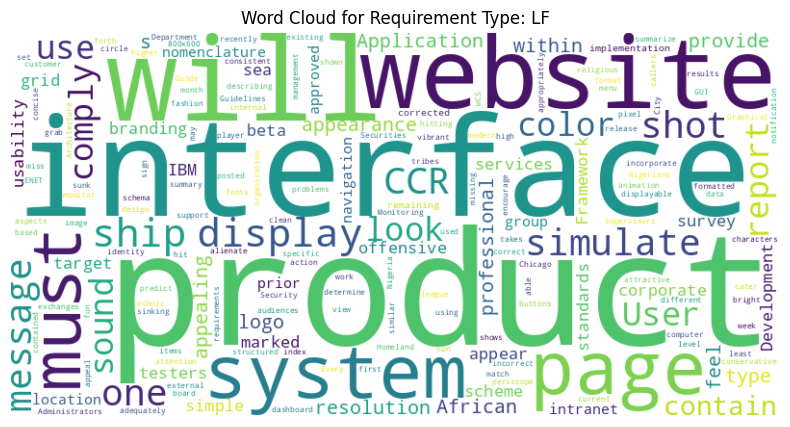

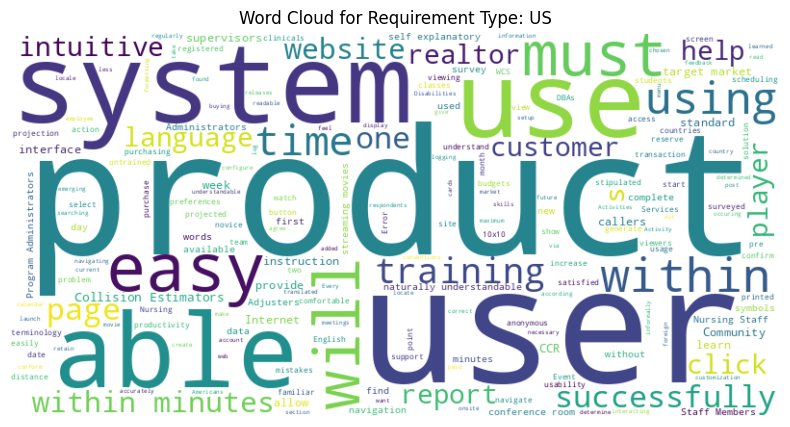

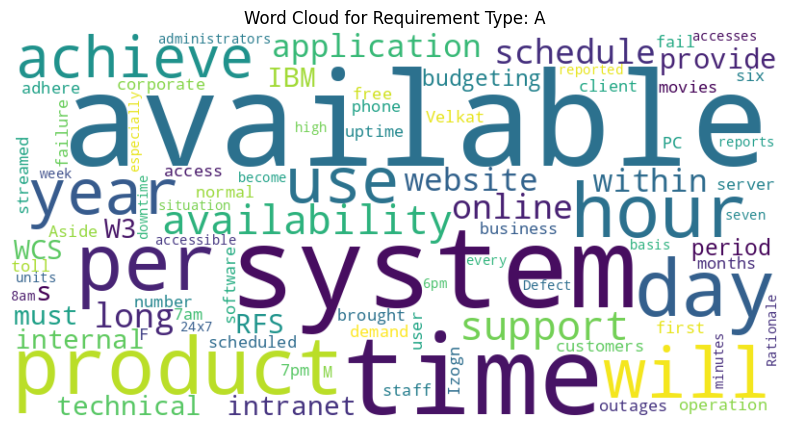

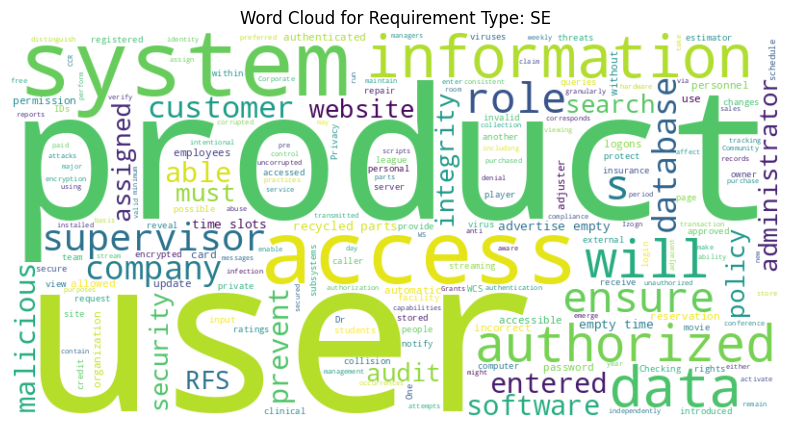

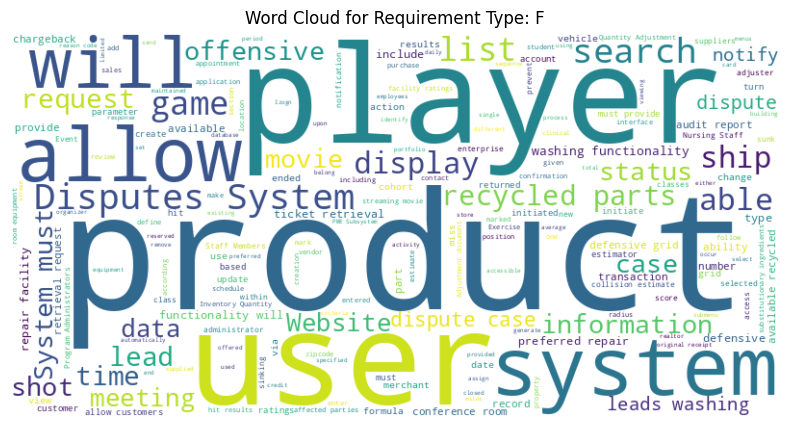

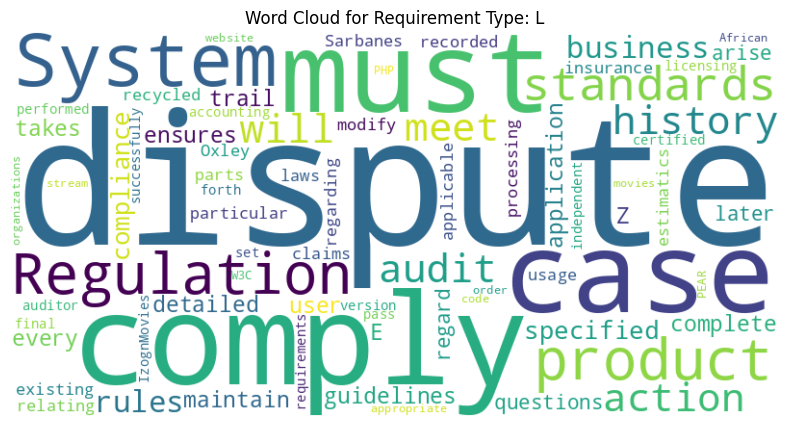

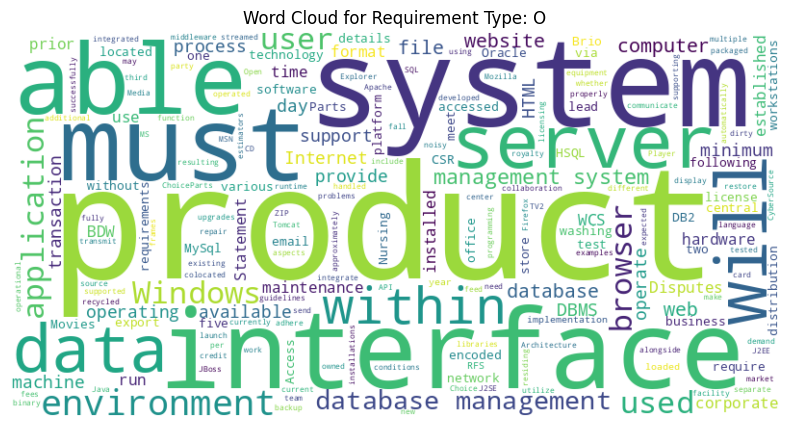

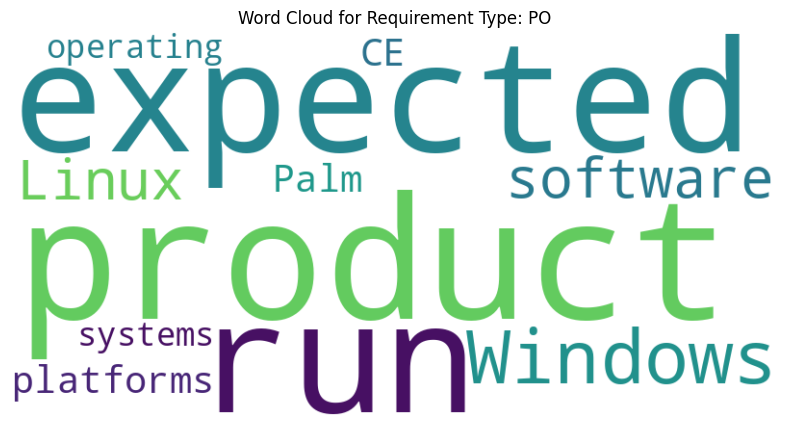

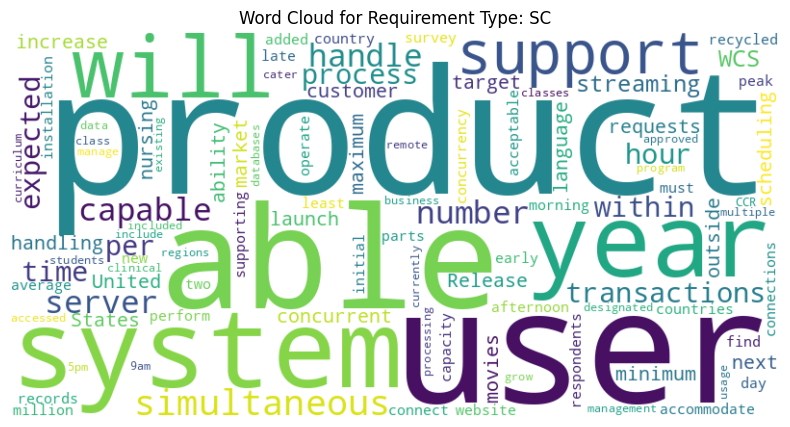

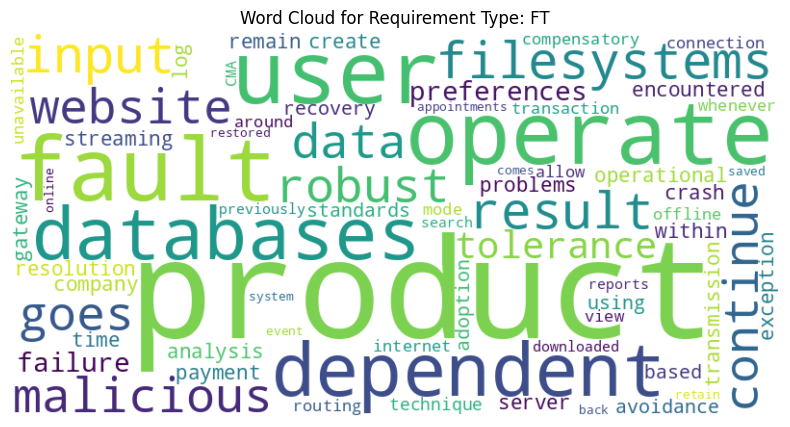

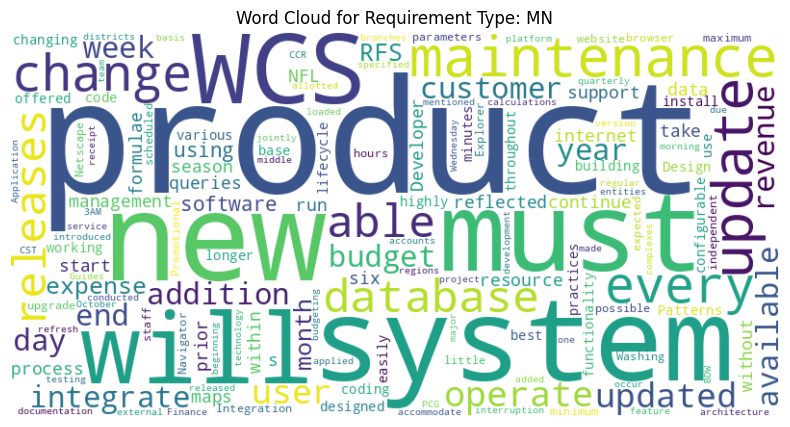

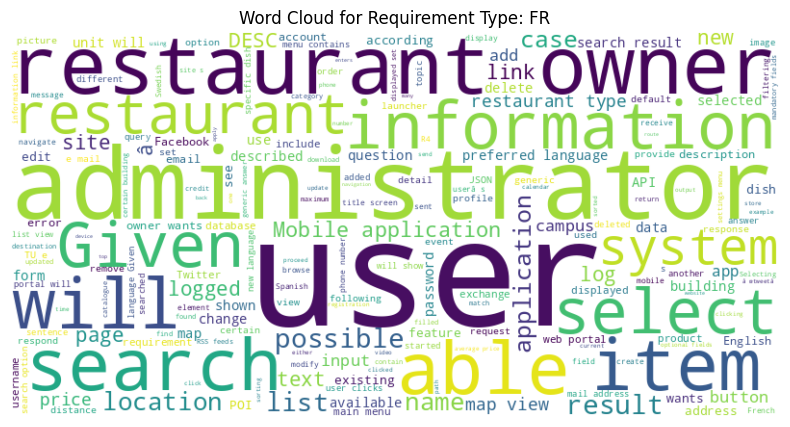

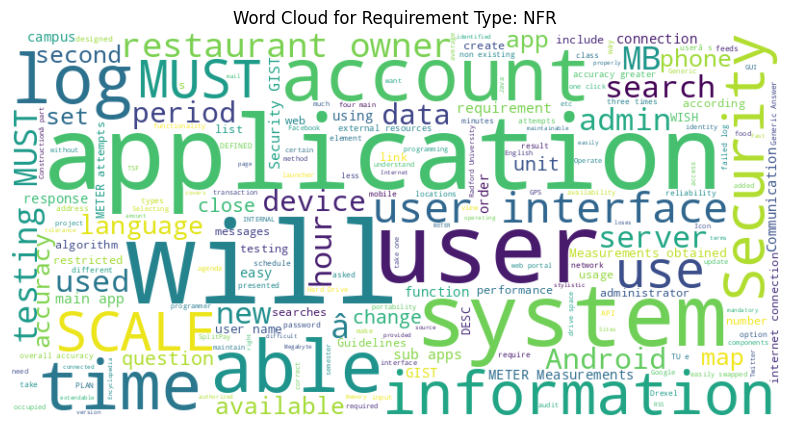

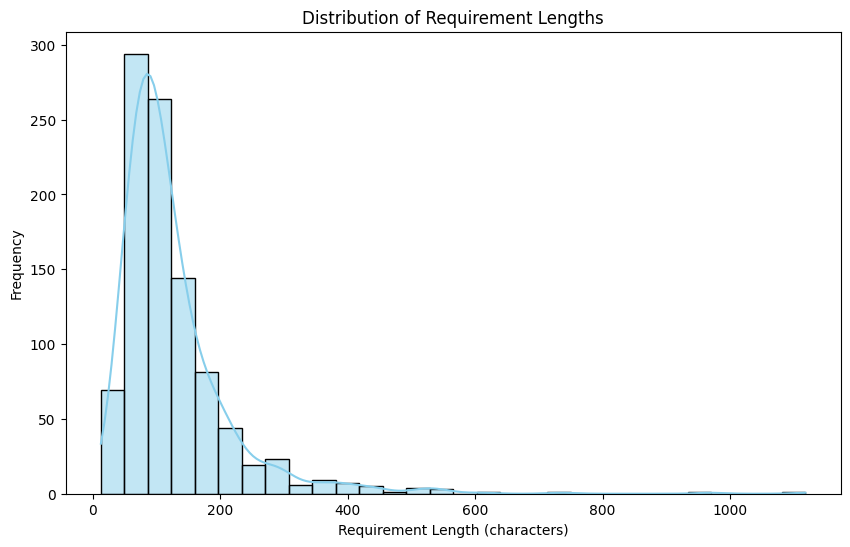

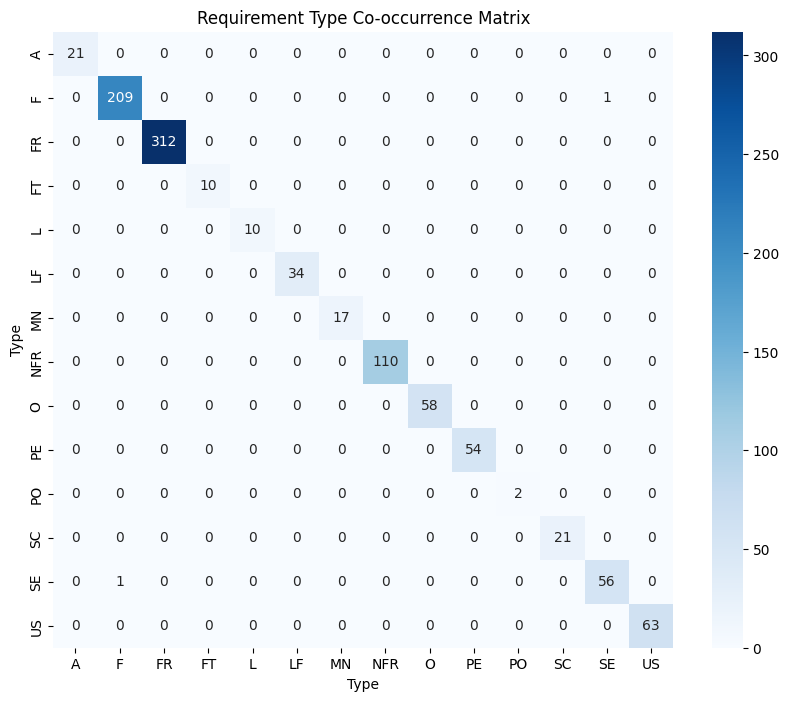

In [ ]:
def generate_word_clouds_by_type(dataset1):
    requirement_types = dataset1['Type'].unique()

    for req_type in requirement_types:
        text = " ".join(requirement for requirement in dataset1[dataset1['Type'] == req_type]['Requirement'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Requirement Type: {req_type}")
        plt.show()



# 3. Requirement Type Co-occurrence Matrix
def requirement_type_cooccurrence_matrix(dataset1):
    # This assumes a requirement can belong to multiple types, stored as lists in the 'requirement_type' column
    dataset1 = dataset1.explode('Type')  # Splits multi-type entries
    co_occurrence = pd.crosstab(dataset1['Requirement'], dataset1['Type']).T.dot(
        pd.crosstab(dataset1['Requirement'], dataset1['Type'])
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
    plt.title("Requirement Type Co-occurrence Matrix")
    plt.show()

# Run visualizations
generate_word_clouds_by_type(dataset1)
requirement_type_cooccurrence_matrix(dataset1)

In [52]:
# 1. Check for Missing / Incomplete Data
def check_missing_data(dataset1):
    missing_data = dataset1.isnull().sum()
    incomplete_rows = dataset1[dataset1.isnull().any(axis=1)]

    print("Missing Data Summary:")
    print(missing_data)
    print("\nRows with Incomplete Data:")
    print(incomplete_rows)

    return missing_data, incomplete_rows

missing_data, incomplete_rows = check_missing_data(dataset1)


Missing Data Summary:
Type                  0
Requirement           0
Category              0
Requirement_Length    0
Word_Count            0
Character_Count       0
length                0
dtype: int64

Rows with Incomplete Data:
Empty DataFrame
Columns: [Type, Requirement, Category, Requirement_Length, Word_Count, Character_Count, length]
Index: []


In [53]:
def check_duplicates(dataset1):
    duplicate_rows = dataset1[dataset1.duplicated()]
    print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
    print("Duplicate Rows:")
    print(duplicate_rows)

    return duplicate_rows
duplicate_rows = check_duplicates(dataset1)



Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [Type, Requirement, Category, Requirement_Length, Word_Count, Character_Count, length]
Index: []


## **dataset** **2**

In [13]:
dataset2  =pd.read_csv("/content/nfr-train.csv")
dataset2

Column1                                            Column2
0        PE  The system shall refresh the display every 60 ...
1        LF  The application shall match the color of the s...
2        US   If projected  the data must be readable.  On ...
3         A   The product shall be available during normal ...
4        US   If projected  the data must be understandable...
..      ...                                                ...
551      PE  The product interface should be fast. The resp...
552       F  The system will use the stored e-mail addresse...
553       F   The system will notify affected parties for r...
554       F   The system will notify affected parties when ...
555       F   The system will notify affected parties when ...

[556 rows x 2 columns]

In [14]:
print(dataset2.dtypes)


Column1    object
Column2    object
dtype: object


In [15]:
print(dataset2.shape)


(556, 2)


In [16]:
dataset2.rename(columns={"Column1": "Type", "Column2": "Requirement"} ,inplace=True)



In [17]:
print("Distribution of each requirement type:")
print(dataset2['Type'].value_counts())

Distribution of each requirement type:
Type
F     210
US     63
O      58
SE     56
PE     54
LF     34
A      21
SC     21
MN     17
L      10
FT     10
PO      2
Name: count, dtype: int64


##**test dataset**

In [18]:
testDataSet = pd.read_csv("/content/nfr-test.csv")
testDataSet

Column1                                            Column2
0        F     The system shall display Events or Activities.
1        F   The display shall have two regions left 2/3 o...
2        F  The data displayed in both the nodes within th...
3        F  The table side of the display shall be split i...
4        F  The top 1/4 of the table will hold events that...
..     ...                                                ...
65      SE  The Disputes application shall manipulate and ...
66      SE  All updates to data files or database must be ...
67       L  The Disputes application must conform to the l...
68       L  All business rules specified in the Disputes S...
69       L  The Disputes application must conform to the l...

[70 rows x 2 columns]

In [19]:
testDataSet.rename(columns={"Column1": "Type", "Column2": "Requirement"}, inplace=True)

##**Functions**

In [20]:
## lower casing

def lower_casing(df):
  df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
  return df

newDS1=lower_casing(dataset1.copy())
newDS2=lower_casing(dataset2.copy())
newTestDS=lower_casing(testDataSet.copy())


In [21]:
## removing non word and non whitespaces
def remover(df):
  df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
  return df

newDS1=remover(newDS1)
newDS2=remover(newDS2)
newTestDS=remover(newTestDS)

In [22]:
## removing digits
def digit_remover(df):
  df = df.replace(to_replace=r'\d', value='', regex=True)
  return df

newDS1=digit_remover(newDS1)
newDS2=digit_remover(newDS2)
newTestDS=digit_remover(newTestDS)


In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
## remove puncituation
def remove_punc(df,label):
  xx= []
  for i in range(len(df[label])):
    temp =df[label][i]
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in temp.split()]
    stripped = ' '.join(stripped)
    xx.append(stripped)
  return xx

newDS1['Requirement']=remove_punc(newDS1,'Requirement')
newDS2['Requirement']=remove_punc(newDS2,'Requirement')
newTestDS['Requirement']=remove_punc(newTestDS,'Requirement')



In [25]:
## before stepping into integration and tokenization phase we just make sure all our datasets have the same features
print(newDS1['Type'].unique())
print(newDS2['Type'].unique())
print(newTestDS['Type'].unique())

['pe' 'lf' 'us' 'a' 'se' 'f' 'l' 'o' 'po' 'sc' 'ft' 'mn' 'fr' 'nfr']
['pe' 'lf' 'us' 'a' 'se' 'f' 'l' 'o' 'po' 'sc' 'ft' 'mn']
['f' 'lf' 'us' 'o' 'se' 'l']


In [ ]:
## check if all sentences are written in english characters
def count_non_english_characters(df,label):
  count =[]
  for i in range(len(df[label])):
    non_english_chars = re.findall(r'[^a-zA-Z\s]', df[label][i])
    if non_english_chars:  print(non_english_chars , df[label][i])
    count.append(len(non_english_chars))
    # count = len(non_english_chars)
  return sum(count)  # Output: 8


In [ ]:
## dataset 1
x=count_non_english_characters(newDS1,'Requirement')
print('Number of non english  characters : ' , x)

In [ ]:
## dataset 2
y=count_non_english_characters(newDS2,'Requirement')
print('Number of non english  characters : ' , y)

In [ ]:
##test dataset
z=count_non_english_characters(newTestDS,'Requirement')
print('Number of non english  characters : ' , z)

In [ ]:
## removing the non english
def remove_non_english_characters(df,label):
  x=[]
  for i in range(len(df[label])):
    temp = df[label][i]
    non_english_chars = re.sub(r'[^a-zA-Z\s]', '', temp)
    x.append(non_english_chars)
  return x

newDS1['Requirement']=remove_non_english_characters(newDS1,'Requirement')
newDS2['Requirement']=remove_non_english_characters(newDS2,'Requirement')
newTestDS['Requirement']=remove_non_english_characters(newTestDS,'Requirement')

## testing our work
print('Number of non english characters dataset 1 : ',count_non_english_characters(newDS1,'Requirement') ,'\nNumber of non english characters dataset 2 : ', count_non_english_characters(newDS2,'Requirement'),'\nNumber of non english  characters : ',
count_non_english_characters(newTestDS,'Requirement'))

##Dataset Integration

In [ ]:
## from pandas we knew that
## merge() for combining data on common columns or indices
## join() for combining data on a key column or an index
## concat() for combining DataFrames across rows or columns
## and since our datasets doesn't have a key value we'd like to merge on both datasets have the same feature values we will use concat

print(newDS1.shape)
print(newDS2.shape)
PrepDS = pd.concat([newDS1, newDS2], ignore_index=True)
print(PrepDS.shape)


## stemming :  Convert words to their base forms to reduce redundancy.
## lemmatization :  Convert words to their base forms to reduce redundancy.
##named entity recognition :  Identify entities such as people, systems, dates, etc., which could be crucial in defining use cases.



## **Note** : that the differnece between stemming and lemmatization is that

1 ) meaning
stemming : meaning isn't important to me or the proccess
lemmatization : meaning is very important ans=d can actually determine the output

2) based
stemming : rule approch based where it focuses on finding the words with the same root no matter thier meaning
lemmatization : dictionary based approch where it traces the word back to it's root and determine it's meaning based on :-
                        1 - it's dictionary meaning and
                        2 - it's position in the sentence  
3)accuracy
lemmataization is more accurate the stemming

****Ex :  studies****


stemming output : **studi** based on it can be studies or studied
lemmatzation output : **study** based on studies means in the dictionary the action of studying with it's infinitive form is study


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')



##**Remove Stop Words** :  remove common ones that don't contribute to understanding requirements.

In [ ]:


def remove_SW(ds,label):
  x = []
  for i in range(len(ds[label])):
    words = word_tokenize(ds[label][i])
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_sentence)
    # print("Filtered Sentence (without stop words):", filtered_sentence)
    x.append(filtered_sentence)
  return x


PrepDS['Requirement']=remove_SW(PrepDS,'Requirement')
newTestDS['Requirement']=remove_SW(newTestDS,'Requirement')




##**Tokenization** : Split the transcribed text into sentences and words.



In [ ]:

# Get unique words
unique_words = set(PrepDS['Requirement'])
num_unique_words = len(unique_words)


## OOV means the words that couldn't get tokenized

tokenizer = Tokenizer(num_words = num_unique_words, oov_token="<OOV>")
tokenizer.fit_on_texts(PrepDS['Requirement'])
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(PrepDS['Requirement'])

padded = pad_sequences(sequences, maxlen=5)
# print("\nWord Index = " , word_index)
# print("\nSequences = " , sequences)
# print("\nPadded Sequences:")
# print(padded)


# Try with words that the tokenizer wasn't fit to
test_data = [
    'the system shall be responisve',
    'the program needs to be done within days'
]
Test_sequences = tokenizer.texts_to_sequences(newTestDS['Requirement'])


test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)

## Note : 1 in the test sequnce stands for OOV which means this word in test case wasn't recognized , found or tokenized in the train Dataset

In [ ]:
# Named Entity Recognition
def extract_named_entities(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    named_entities = nltk.ne_chunk(pos_tags, binary=False)
    entities = []
    for chunk in named_entities:
        if hasattr(chunk, 'label'):
            entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))
    return entities

## **Speech Tagging** : Tagging: Understand the role each word plays in the sentence to help identify action verbs (e.g., "must", "should", "requires") related to requirements.

In [ ]:

# Assume the text is already tokenized
tokenized_sentence = ['The', 'system', 'should', 'process', 'orders', 'quickly', 'and', 'efficiently', '.']

# Perform POS tagging on the tokenized sentence
pos_tags = nltk.pos_tag(word_index)

# Display the result
print("POS Tags:", pos_tags)


word_tokenize(text): Tokenizes the text into individual words.

nltk.pos_tag(tokens): Tags each word with its respective Part-of-Speech (POS), such as:

NN = Noun

VB = Verb

RB = Adverb

DT = Determiner, etc.

POS Tags Key (Examples):

NN: Noun (singular)

NNS: Noun (plural)

VB: Verb (base form)

VBD: Verb (past tense)

RB: Adverb

JJ: Adjective

## **lemmatization** : refers to understanding the context of the word it's more of a dictnory based method

> Add blockquote



Ex : studies => study
\


In [ ]:
lemmatizer = WordNetLemmatizer()


def lemmatization(df , label):
  x=[]
  for i in range(len(df[label])):
    temp = df[label][i]
    words = word_tokenize(temp)
    tag = nltk.pos_tag([temp])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    ff= tag_dict.get(tag, wordnet.NOUN)
    lemmatized_words = [lemmatizer.lemmatize(word.lower(), ff) for word in words]

    # Join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    x.append(lemmatized_sentence)
  return x

xx=lemmatization(PrepDS,'Requirement')

xx









